In [69]:
bay_area = pd.read_excel(r"C:\Users\detro\Downloads\uw_supplier_data030823.xlsx")



In [70]:
bay_area.head()

,Supplier Name,Public Water System ID,Reporting Month,County,Hydrologic Region,Climate Zone,Total Population Served,Reference 2014 Population,County Under Drought Declaration,Water Shortage Contingency Stage Invoked,...,"REPORTED PRELIMINARY Commercial, Industrial, and Institutional Water","REPORTED FINAL Commercial, Industrial, and Institutional Water",REPORTED Recycled Water,REPORTED Non-Revenue Water,CALCULATED Total Potable Water Production Gallons (Ag Excluded),CALCULATED Total Potable Water Production Gallons 2013 (Ag Excluded),CALCULATED Commercial Agricultural Water Gallons,CALCULATED Commercial Agricultural Water Gallons 2013,CALCULATED R-GPCD,Qualification
0,East Bay Municipal Utilities District,CA0110005,2023-01-15,"Alameda,Contra Costa",San Francisco Bay,3,1440000,1379000,Yes,Stage 2,...,939.0,NaN,NaN,NaN,3.696000e+09,4.099000e+09,NaN,0.0,48.0215,1. To provide context…the average R-GPCD for J...
1,East Bay Municipal Utilities District,CA0110005,2022-12-15,"Alameda,Contra Costa",San Francisco Bay,3,1430000,1379000,Yes,Stage 2,...,816.0,NaN,NaN,NaN,3.722000e+09,4.772000e+09,NaN,0.0,50.3767,1. To provide context…the average R-GPCD for D...
2,East Bay Municipal Utilities District,CA0110005,2022-11-15,"Alameda,Contra Costa",San Francisco Bay,3,1430000,1379000,Yes,Stage 2,...,816.0,NaN,NaN,NaN,3.947000e+09,5.149000e+09,NaN,0.0,56.1228,1. To provide context…the average R-GPCD for N...
3,East Bay Municipal Utilities District,CA0110005,2022-10-15,"Alameda,Contra Costa",San Francisco Bay,3,1430000,1379000,Yes,Stage 2,...,954.0,NaN,NaN,NaN,4.984000e+09,6.175000e+09,NaN,0.0,67.4577,1. To provide context…the average R-GPCD for O...
4,East Bay Municipal Utilities District,CA0110005,2022-09-15,"Alameda,Contra Costa",San Francisco Bay,3,1430000,1379000,Yes,Stage 2,...,986.0,NaN,NaN,NaN,5.240000e+09,6.528000e+09,NaN,0.0,75.7296,1. To provide context…the average R-GPCD for S...


In [71]:
bay_area1 = bay_area[['Hydrologic Region', 'Reporting Month', 'CALCULATED R-GPCD']]

In [72]:
bay_area1.head()

,Hydrologic Region,Reporting Month,CALCULATED R-GPCD
0,San Francisco Bay,2023-01-15,48.0215
1,San Francisco Bay,2022-12-15,50.3767
2,San Francisco Bay,2022-11-15,56.1228
3,San Francisco Bay,2022-10-15,67.4577
4,San Francisco Bay,2022-09-15,75.7296


In [73]:
bay_area1.dtypes

Hydrologic Region            object
Reporting Month      datetime64[ns]
CALCULATED R-GPCD           float64
dtype: object

In [76]:
bay_area2 = bay_area1.astype({'Hydrologic Region':'string'})

In [77]:
bay_area2.dtypes

Hydrologic Region            string
Reporting Month      datetime64[ns]
CALCULATED R-GPCD           float64
dtype: object

In [79]:
bay_area2['Hydrologic Region'].unique()

<StringArray>
['San Francisco Bay',     'Central Coast',       'South Coast',
 'San Joaquin River',  'Sacramento River',    'Colorado River',
       'North Coast',       'Tulare Lake',    'South Lahontan',
    'North Lahontan']
Length: 10, dtype: string

In [121]:
bay_area2.count()

Hydrologic Region    41006
Reporting Month      41006
CALCULATED R-GPCD    41006
dtype: int64

In [122]:
bay_area3 = bay_area2.loc[bay_area2["Hydrologic Region"] == 'San Francisco Bay' ]

In [123]:
bay_area3['Hydrologic Region'].unique()

<StringArray>
['San Francisco Bay']
Length: 1, dtype: string

In [124]:
bay_area3.count()

Hydrologic Region    4819
Reporting Month      4819
CALCULATED R-GPCD    4819
dtype: int64

In [125]:
bay_area3.head()

,Hydrologic Region,Reporting Month,CALCULATED R-GPCD
0,San Francisco Bay,2023-01-15,48.0215
1,San Francisco Bay,2022-12-15,50.3767
2,San Francisco Bay,2022-11-15,56.1228
3,San Francisco Bay,2022-10-15,67.4577
4,San Francisco Bay,2022-09-15,75.7296


In [126]:
import seaborn as sns

In [129]:
import numpy as np

In [136]:
bay_area4 = bay_area3.loc[bay_area3["Reporting Month"] <= "2019-1-1" ]

In [143]:
import matplotlib.pyplot as plt

(array([16252., 16436., 16617., 16801., 16983., 17167., 17348., 17532.,
        17713., 17897.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

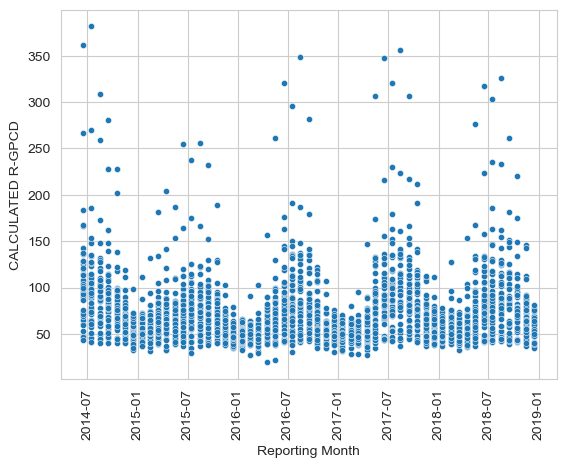

In [149]:
sns.scatterplot(x = 'Reporting Month', y = 'CALCULATED R-GPCD', s=20, data=bay_area4)
plt.xticks(rotation=90)


In [151]:
from datetime import date

In [155]:
bay_area4['date_ordinal'] = pd.to_datetime(bay_area4['Reporting Month']).apply(lambda date: date.toordinal())

C:\Users\detro\AppData\Local\Temp\ipykernel_23684\1504871695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bay_area4['date_ordinal'] = pd.to_datetime(bay_area4['Reporting Month']).apply(lambda date: date.toordinal())


In [156]:
bay_area4.head()

,Hydrologic Region,Reporting Month,CALCULATED R-GPCD,date_ordinal
49,San Francisco Bay,2018-12-15,51.9860,737043
50,San Francisco Bay,2018-11-15,59.8974,737013
51,San Francisco Bay,2018-10-15,71.9025,736982
52,San Francisco Bay,2018-09-15,79.3613,736952
53,San Francisco Bay,2018-08-15,83.2254,736921


<AxesSubplot:xlabel='date_ordinal', ylabel='CALCULATED R-GPCD'>

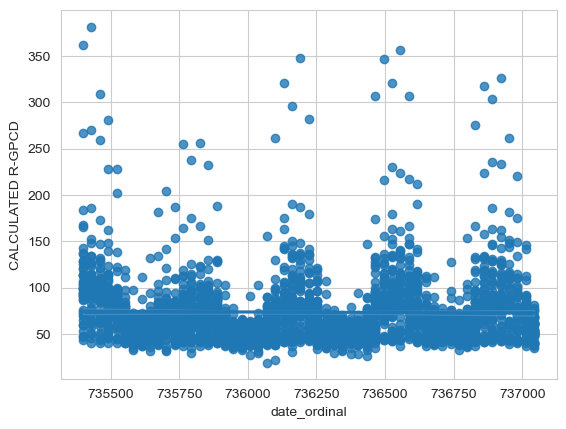

In [157]:
sns.regplot(x = "date_ordinal", y = "CALCULATED R-GPCD", data = bay_area4)

In [158]:
print(bay_area4['date_ordinal'].max())

737043


In [159]:
print(bay_area4['date_ordinal'].min())

735399


<AxesSubplot:xlabel='date_ordinal', ylabel='CALCULATED R-GPCD'>

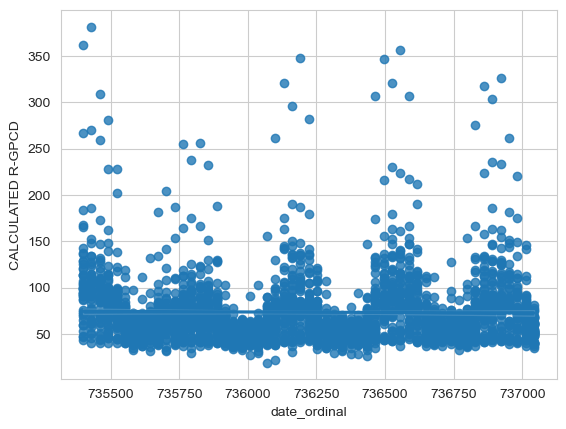

In [162]:
sns.regplot(x = "date_ordinal", y = "CALCULATED R-GPCD", data = bay_area4)

<AxesSubplot:xlabel='date_ordinal', ylabel='CALCULATED R-GPCD'>

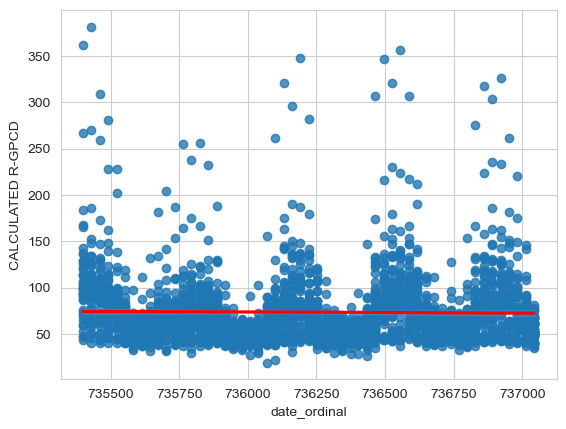

In [165]:
sns.regplot(x = "date_ordinal", y = "CALCULATED R-GPCD", data = bay_area4,
                line_kws={"color": "red"})

Text(0.5, 0, 'Reporting Month')

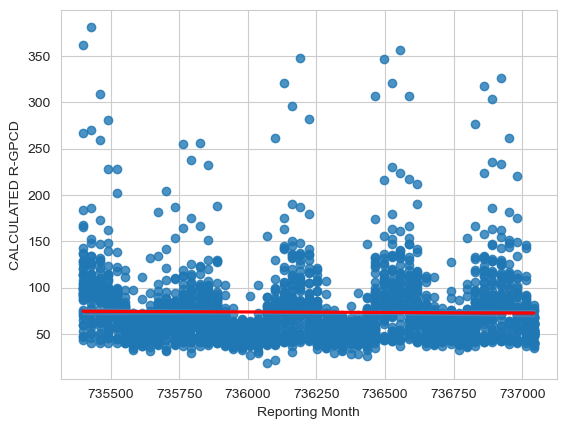

In [166]:
sns.regplot(x = "date_ordinal", y = "CALCULATED R-GPCD", data = bay_area4,
                line_kws={"color": "red"})
plt.xlabel('Reporting Month')